In [ ]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


In [ ]:
X_train = X_train.reshape(60000,28,28,1)

In [ ]:
X_test = X_test.reshape(10000,28,28,1)

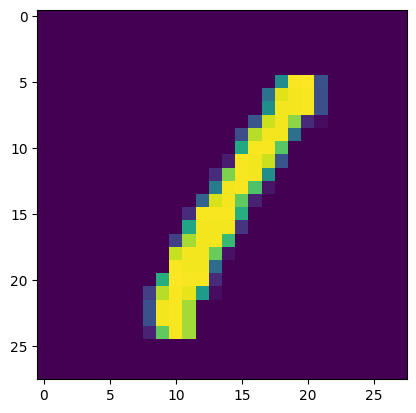

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(X_train[3])
# plt.show()

In [ ]:
X_train = X_train/255.0

In [ ]:
X_train[0].shape

(28, 28, 1)

In [ ]:
# Creating the model

In [ ]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
model = Sequential()

model.add(Conv2D(64,kernel_size=(3,3),activation ="relu", input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2), strides=None))

model.add(Conv2D(64,kernel_size=(3,3),activation ="relu"))
model.add(MaxPooling2D(pool_size=(2,2), strides=None))

model.add(Flatten())

model.add(Dense(128, activation="relu"))
model.add(Dense(10, activation="softmax"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 64)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
model.compile(optimizer ="adam", loss ="sparse_categorical_crossentropy",metrics=['accuracy'],run_eagerly=True)

In [ ]:
model.fit(X_train,y_train, epochs=1, validation_split=0.1)

1688/1688 [==============================] - 65s 35ms/step - loss: 0.1293 - accuracy: 0.9600 - val_loss: 0.0472 - val_accuracy: 0.9865


In [ ]:
pip install opencv-python

In [ ]:
import cv2
import os
import random
import numpy as np

In [ ]:
my_dir = ''

In [ ]:
data = []  # empty list to store all numpy array of images of cats and dogs

for i in categories:

    folder_path = os.path.join(my_dir,i)

    if i == 'cat':
        label = 0
    else:
        label = 1

    for j in os.listdir(folder_path):

        img_path = os.path.join(folder_path,j)  # folder_path to j to make it in the img_path
        img = cv2.imread(img_path)
        # plt.imshow(img)
        img = cv2.reshape(img,(150,150))
        data.append([img,label])   # cause i need this to be like a list in a list [[],[],[]....] where each [array(img),label]
        # print(img_path)
        break

    # print(folder_path)

In [ ]:
os.listdir(folder_path)  # listdir function gives all the elements present inside each of the folder_path

In [ ]:
print(img)  # an array of all the pixels of the perticular image (563,400,3) something like that

In [ ]:
# now we need to make different list for features and labels
X =[]
y =[]

for features,labels in data:
    X.append(features)
    y.append(labels)

In [ ]:
X[0] # just a comparision btw the two typeof data

In [ ]:
np.array(X)[0]

In [ ]:
X = np.array(X)
y = np.array(y) # changes to numpy array before it was just a list

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
X_train = X_train/255.0
X_test = X_test/255.0

In [ ]:
# now we make the same model

In [ ]:
from keras import Sequential
from kears.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
model = Sequential()

model.add(Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(64,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [ ]:
model.summary()

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
model.fit(X_train,y_train,epoch=1,validation_split=0.2)

In [ ]:
# Data Augmentation (for a single file the ofcoure the model building and prediction)

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image  # with the help of image we can do task like cv2.imread (same as openCV) and don't really need matplotlib to load the image where as we did that in openCV (plt.imread(img))

In [ ]:
img = image.load_img(r'/content/Screenshot 2024-06-28 022131.png', target_size(200,200))

In [ ]:
type(img) # it's not numpy array it's PIL(python imaging library) Image.Image like an object of PIL

In [ ]:
# creates a data generator object that transforms images
datagen = ImageDataGenerator(
rotation_range=40,
width_shift_range=0.2,
height_shift_range=0.2,
shear_range=0.2,
zoom_range=0.2,
horizontal_flip=True,
fill_mode='nearest')

# pick an image to transform
test_img = train_images[20]
img = image.img_to_array(test_img)  # convert image to numpy arry from PIL.Image.Image
img = img.reshape((1,) + img.shape)  # reshape image (1 image of unknown dimention)

i = 0

for batch in datagen.flow(img, save_prefix='test', save_format='jpeg'):  # this loops runs forever until we break, saving images to current directory with specified prefix
    plt.figure(i)
    plot = plt.imshow(image.img_to_array(batch[0]))
    i += 1
    if i > 4:  # show 4 images
        break

plt.show()

In [ ]:
print(img.reshape((1,) + img.shape))

In [ ]:
# Data Augmentation (with folder and multiple images from - keras ImageDataGenerator documentaion)

In [ ]:
batch_size = 16

# this is the augmentation configuration we will use for training
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1./255)

# this is a generator that will read pictures found in
# subfolers of 'data/train', and indefinitely generate
# batches of augmented image data
train_generator = train_datagen.flow_from_directory(
        'data/train',  # this is the target directory
        target_size=(150, 150),  # all images will be resized to 150x150
        batch_size=batch_size,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

# this is a similar generator, for validation data
validation_generator = test_datagen.flow_from_directory(
        'data/validation',
        target_size=(150, 150),
        batch_size=batch_size,
        class_mode='binary')


In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=(3, 150, 150)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# the model so far outputs 3D feature maps (height, width, features)


In [ ]:
model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])


In [ ]:
model.fit_generator(
        train_generator, # the training generator here is the new dataset after the augumentaion not the original one is used
        steps_per_epoch=2000 // batch_size,
        epochs=5,
        validation_data=validation_generator,
        validation_steps=800 // batch_size)
model.save_weights('first_try.h5')  # always save your weights after training or during training

In [ ]:
# Transfer Leaning (VGG16)

In [ ]:
from keras.applications.vgg16 import VGG16

In [ ]:
model = VGG16()

553467096/553467096 [==============================] - 9s 0us/step


In [ ]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [ ]:
from keras.preprocessing import image # with the help of image we can do task like cv2.imread (same as openCV) and don't really need matplotlib to load the image where as we did that in openCV (plt.imread(img))
import os # to deal with folders and file

In [ ]:
if not os.path.exists('sample'):
    os.makedirs('sample')

In [ ]:
for file in os.listdir('sample'):
  path = os.path.join('sample/',file)
  img = image.load_img(path, target_size=(224,224))
  plt.imshow(img)
  img = image.img_to_array(img)
  img = img.reshape((1,224,224,3))
  y_pred = model.predict(img)
  print(decode_predictions(y_pred,top=1))

  # plt.subplots() # print all the images in the folder itself
  # print(path) # the error is due to the coversion of image to array and with 4 dimensions so now it now printable (irrelevent shape now of (1,224,224,3))

  plt.show()

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
from keras.applications.vgg16 import decode_predictions

In [ ]:
model.save("vgg16.keras")

In [ ]:
os.path.dirname("vgg16.keras")

''

In [ ]:
os.getcwd()

'/content'

In [ ]:
# Using VGG16 and Sequential together and removing the last layer and adding our own

In [ ]:
from keras import Sequential

In [ ]:
model = Sequential()

In [ ]:
type(model)

keras.src.engine.sequential.Sequential

In [ ]:
from keras.applications.vgg16 import VGG16

In [ ]:
vgg16 = VGG16()

In [ ]:
print(type(vgg16))

<class 'keras.src.engine.functional.Functional'>


In [ ]:
for layer in vgg16.layers[:-1]:
  model.add(layer)  # here we're adding the vgg16 layers to Sequential model we have like we do when we create normal CNN
  # print(layer)
  # print(layer.__class__.__name__)

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [ ]:
for layer in model.layers:
  layer.trainable = False

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [ ]:
from keras.layers import Dense

In [ ]:
model.add(Dense(1,activation="sigmoid"))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 56, 56, 256)       2

In [ ]:
# now we'll just compile it and run the fit_generator and run the generator code written at the top of the notebook

In [ ]:
model.compile(optimizer='adam',loss="binary_crossentropy",metrics=['accuracy'])

In [ ]:
model.fit_generator(
      train_generator,
      steps_per_epoch = 2000 // batch_size
      epochs = 5
      validation_data = validation_generator,
      validation_step = 800 // batch_size)

In [ ]:
from keras.models import Model

In [ ]:
model = Model(inputs = x, outputs =[output1, output2])

In [ ]:
from keras.layers import *

In [ ]:
x = Input(shape=(10,))  # 10 columns data is going to come

In [ ]:
hidden1 = Dense(128, activation='relu')(x)
hidden2 = Dense(64, activation='relu')(hidden1)

output1 = Dense(1, activation='sigmoid')(hidden2)
output2 = Dense(5, activation='softmax')(hidden2)  # let's say this is multiclassification problem and it has 5 classes

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 10)]                 0         []                            
                                                                                                  
 dense (Dense)               (None, 128)                  1408      ['input_1[0][0]']             
                                                                                                  
 dense_1 (Dense)             (None, 64)                   8256      ['dense[0][0]']               
                                                                                                  
 dense_2 (Dense)             (None, 1)                    65        ['dense_1[0][0]']             
                                                                                              

In [ ]:
from keras.utils import plot_model

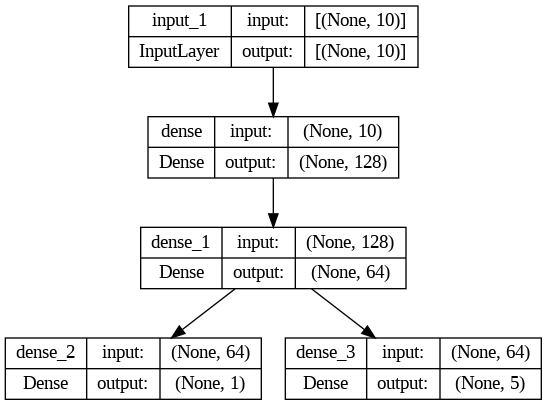

In [ ]:
plot_model(model, show_shapes=True)